# Plane Crash fatalities

This dataset was upload from Kaggle on the 09/07/2020

Airplane Crashes and Fatalities Since 1908 (Full history of airplane crashes throughout the world, from 1908-present)
At the time this Dataset was created in Kaggle (2016-09-09), the original version was hosted by Open Data by Socrata at the at: https://opendata.socrata.com/Government/Airplane-Crashes-and-Fatalities-Since-1908/q2te-8cvq, but unfortunately that is not available anymore. The dataset contains data of airplane accidents involving civil, commercial and military transport worldwide from 1908-09-17 to 2009-06-08.

While applying for a data scientist job opportunity, I was asked the following questions on this dataset:

Yearly how many planes crashed? how many people were on board? how many survived? how many died?  
Highest number of crashes by operator and Type of aircrafts.  
‘Summary’ field has the details about the crashes. Find the reasons of the crash and categorize them in different clusters i.e Fire, shot down, weather (for the ‘Blanks’ in the data category can be UNKNOWN) you are open to make clusters of your choice but they should not exceed 7.  
Find the number of crashed aircrafts and number of deaths against each category from above step.  
Find any interesting trends/behaviors that you encounter when you analyze the dataset.  

### Importing libraries

In [1]:
import os

In [2]:
import pandas as pd

In [3]:
import time
import datetime
from datetime import date
# Import bibliothèques de gestion des dates
from datetime import datetime, timedelta

## Reading the dataset

In [4]:
plane_df = pd.read_csv("data/Airplane_Crashes_and_Fatalities_Since_1908.csv")

Checking the overall structure of the dataset

In [5]:
plane_df.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [6]:
plane_df.tail()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
5263,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras..."
5264,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...
5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
5266,06/07/2009,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...
5267,06/08/2009,NaN,"State of Arunachal Pradesh, India",Military - Indian Air Force,NaN,Mechuka for Jorhat,Antonov An-32,NaN,NaN,13.0,13.0,0.0,The military transport went missing while en r...


Describe (statistics)

In [7]:
plane_df.describe()

,Aboard,Fatalities,Ground
count,5246.000000,5256.000000,5246.000000
mean,27.554518,20.068303,1.608845
std,43.076711,33.199952,53.987827
min,0.000000,0.000000,0.000000
25%,5.000000,3.000000,0.000000
50%,13.000000,9.000000,0.000000
75%,30.000000,23.000000,0.000000
max,644.000000,583.000000,2750.000000


Plotting the distribution of the 3 numerical values (nb of passengers aboard / nb of dead on board / nb of deads on ground)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3db02a9390>,
      dtype=object)

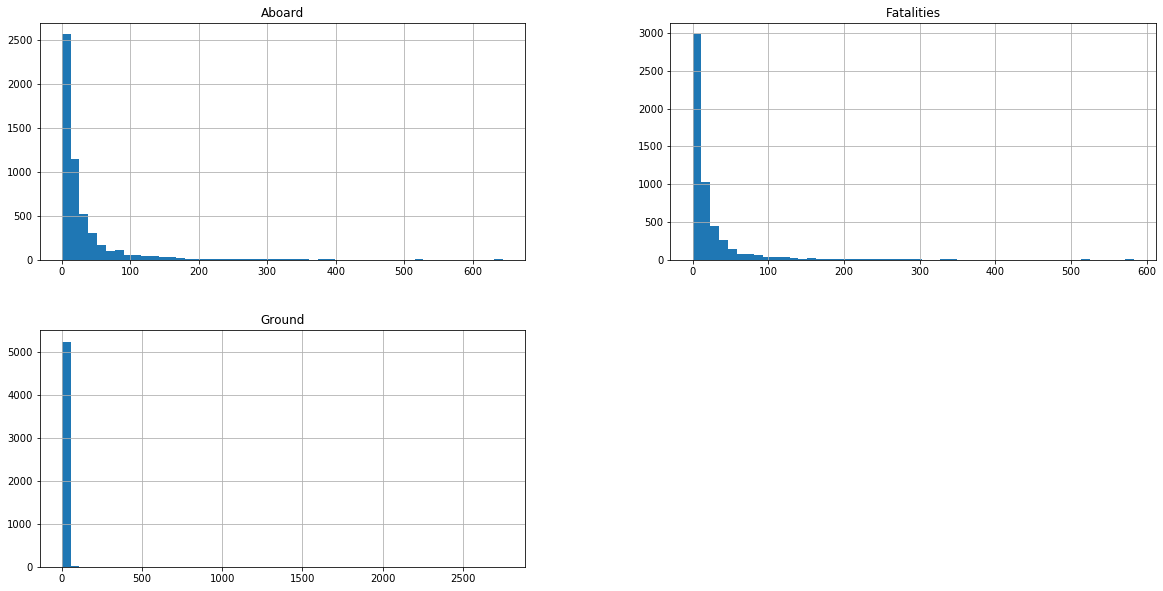

In [8]:
plane_df.hist(bins=50,figsize=(20,10))

Some columns are explicit enough and doesn't need to be detailed that much.  
Some need clarifications :  
- Location => Location of the accident  
- cn/ln => Construction or serial number / Line or fuselage number  
- Route => Complete or partial route flown prior to the accident
- Aboard => Total aboard (passengers / crew)
- Fatalities => Total fatalities aboard (passengers / crew)
- Ground => Total killed on the ground





## Exploration

Let's start by exploring the number of crash per date

As it will be usefull to sort data per year / month, this specific information will be encoded in 2 dedicated columns

Making a copy of the plane_df

In [9]:
plane_df2=plane_df

In [10]:
plane_df2['Date']=pd.to_datetime(plane_df2['Date'])

In [11]:
plane_df2['year'] = plane_df2['Date'].dt.year
plane_df2['month'] = plane_df2['Date'].dt.month

Ploting the evolution of nb of crashes per year

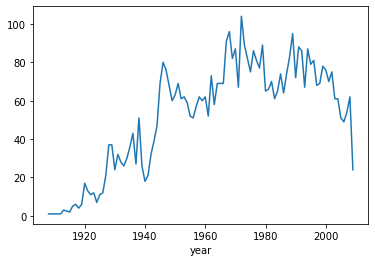

In [12]:
plane_df2.groupby('year').count()['Date'].plot()

Checking if season has an influence on nb of crashes

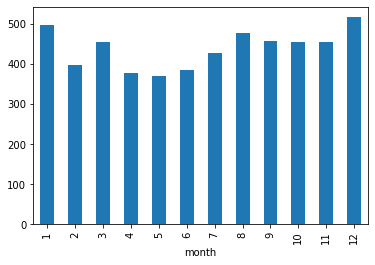

In [13]:
plane_df2.groupby('month').count()['Date'].plot.bar()

The number of crashes seems to decrease during spring time + increases in winter time.  
Let's see the evolution of fatalities

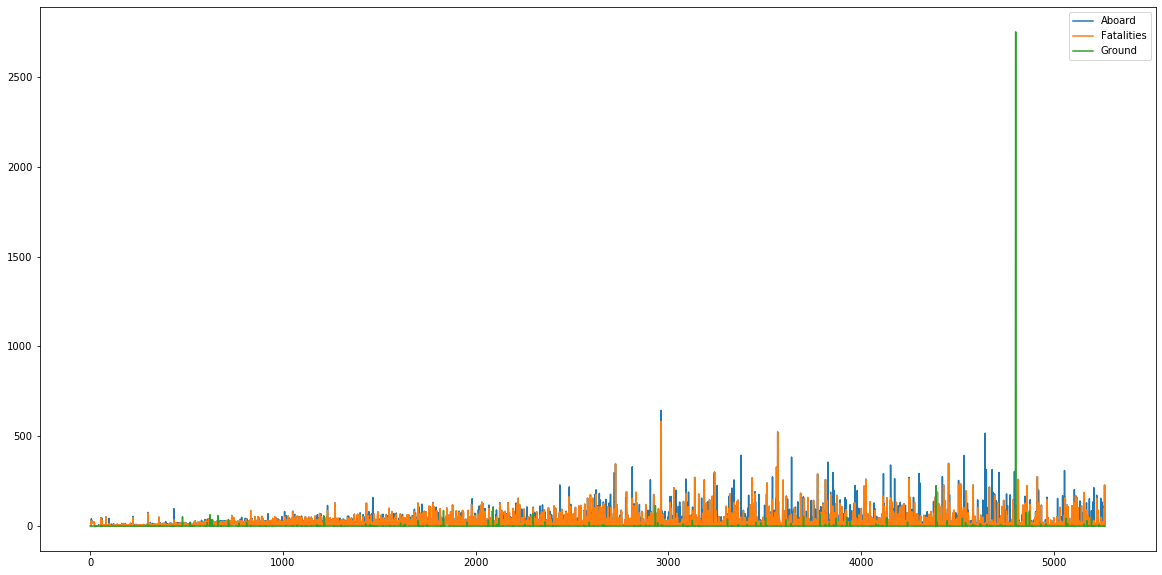

In [14]:
plane_df2[['Aboard','Fatalities','Ground']].plot(figsize=(20,10))

We can identifiy that a specific event involved a high number of fatalities on ground.  
As stated below, this event correspond to NYC 09/11 terrorist attacks

Sorting by the highest number of fatalities on board / ground

In [18]:
plane_df2.sort_values(by='Fatalities',ascending=False).head(20)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,year,month
2963,1977-03-27,17:07,"Tenerife, Canary Islands",Pan American World Airways / KLM,1736/4805,Tenerife - Las Palmas / Tenerife - Las Palmas,Boeing B-747-121 / Boeing B-747-206B,N736PA/PH-BUF,19643/11 / 20400/157,644.0,583.0,0.0,Both aircraft were diverted to Tenerife becaus...,1977,3
3568,1985-08-12,18:56,"Mt. Osutaka, near Ueno Village, Japan",Japan Air Lines,123,Tokyo - Osaka,Boeing B-747-SR46,JA8119,20783/230,524.0,520.0,0.0,The aircraft suffered an aft pressure bulkhead...,1985,8
4455,1996-11-12,18:40,"Near Charkhidadri, India",Saudi Arabian Airlines / Kazastan Airlines,763/1907,New Delhi - Dhahran / Chimkent - New Delhi,Boeing B-747-168B / Ilyushin IL-76TD,HZAIH/UN-76435,22748/555/1023413428,349.0,349.0,0.0,Midair collision 17 km W of New Delhi. The Sa...,1996,11
2726,1974-03-03,11:41,"Near Ermenonville, France",Turkish Airlines (THY),981,Paris - London,McDonnell Douglas DC-10-10,TC-JAV,46704/29,346.0,346.0,0.0,The aircraft crashed shortly after takeoff fro...,1974,3
3562,1985-06-23,07:15,"AtlantiOcean, 110 miles West of Ireland",Air India,182,Montreal - London,Boeing B-747-237B,VT-EFO,21473/330,329.0,329.0,0.0,The aircraft broke up in flight and crashed in...,1985,6
3240,1980-08-19,19:08,"Near Riyadh, Saudi Arabia",Saudi Arabian Airlines,163,Riyadh - Jeddah,Lockheed 1011-200 TriStar,HZ-AHK,1169,301.0,301.0,0.0,The flight experienced a fire in the aft cargo...,1980,8
3775,1988-07-03,10:55,"Over the Persian Gulf, near Bandar Abbas, Iran",Iran Air,655,Bandar Abbas - Dubai,Airbus A300B2-203,EP-IBU,186,290.0,290.0,0.0,The civilian Iranian airliner was shot down by...,1988,7
4916,2003-02-19,17:30,"Near Shahdad, Iran",Military - IslamiRevolution's Guards Corps,NaN,Zahedan - Kerman,Ilyushin Il-76MD,15-22,63471155,275.0,275.0,0.0,"The plane crashed into an 11,500 ft. mountain...",2003,2
3137,1979-05-25,15:04,"Chicago O'Hare, Illinois",American Airlines,191,"Chicago, IL- Los Angeles, CA",McDonnell Douglas DC-10-10,N110AA,46510/22,271.0,271.0,2.0,"During takeoff just, as the plane lifted from ...",1979,5
3436,1983-09-01,18:26,"Near Sakhalin Island, Russia",Korean Airlines,007,Anchorage - Seoul,Boeing B-747-230B,HL-7442,20559/186,269.0,269.0,0.0,"On a flight from Alaska to South Korea, the ai...",1983,9


In [19]:
plane_df2.sort_values(by='Ground',ascending=False).head(20)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,year,month
4803,2001-09-11,08:47,"New York City, New York",American Airlines,11,Boston - Los Angeles,Boeing 767-223ER,N334AA,22332/169,92.0,92.0,2750.0,The aircraft was hijacked shortly after it lef...,2001,9
4804,2001-09-11,09:03,"New York City, New York",United Air Lines,175,Boston - Los Angeles,Boeing B-767-222,N612UA,21873/41,65.0,65.0,2750.0,The aircraft was hijacked shortly after it lef...,2001,9
4390,1996-01-08,12:43,"Kinshasa, Zaire",African Air,NaN,Kinshasa - Kahemba,Antonov AN-32B,RA-26222,2301,6.0,2.0,225.0,The aircraft failed to gain altitude after tak...,1996,1
4802,2001-09-11,09:45,"Arlington, Virginia.",American Airlines,77,Washington D.C. - Los Angeles,Boeing B-757-223,N644AA,24602/365,64.0,64.0,125.0,The aircraft was hijacked after taking off fro...,2001,9
2933,1976-10-13,NaN,"Santa Cruz, Bolivia",Lloyd Aéreo Boliviano,NaN,Santa Cruz - Viru,Boeing B-707-31,N730JP,17671/48,3.0,3.0,113.0,The aircraft failed to climb and crashed into ...,1976,10
2091,1966-12-24,19:15,"Binh Tahi, Da Nang, Vietnam",Flying Tiger Line,NaN,NaN,Canadair CL-44D4-1,N228SW,31,4.0,4.0,107.0,The cargo plane undershot runway by 1 mile whi...,1966,12
1833,1963-02-01,17:15,"Ankara, Turkey",Middle East Airlines / Military - Turkish Air ...,265,Nicosia - Ankara,Vickers Viscount 754D,OD-ADE,244,17.0,17.0,87.0,Midair collision between a civilian and milita...,1963,2
4875,2002-07-27,12:45,"Lviv, Ukraine",Military - Ukraine Air Force,NaN,NaN,Sukhoi Su-27,42,NaN,2.0,0.0,85.0,The Su-76 was performing aerobatics when it cr...,2002,7
4857,2002-05-04,13:30,"Kano, Nigeria",EAS Airlines (Executive Airline Services),4226,Abuja - Jos - Kano - Lagos,BAC One-Eleven 525FT,5N-ESF,266,77.0,74.0,75.0,"The aircraft crashed into houses, two mosques ...",2002,5
2297,1969-03-16,12:00,"Maracaibo, Zulia, Venezuela",Venezolana Internacional de Aviacion,742,Maracaibo - Miami,McDonnell Douglas DC-9-32,YV-C-AVD,47243/448,84.0,84.0,70.0,"Seconds after becoming airborne, the aircraft ...",1969,3


Further investigations would be required to determine if the number of crashes could be linked to specific countries.  
This requires dealing with the Location which contains 2 informations encoded in a single column : city + country  
This data will be splited into 2 different columns.

In [22]:
plane_df2['Location'].str.split(",",n=1,expand=True)

,0,1
0,Fort Myer,Virginia
1,AtlantiCity,New Jersey
2,Victoria,"British Columbia, Canada"
3,Over the North Sea,None
4,Near Johannisthal,Germany
...,...,...
5263,Near Madiun,Indonesia
5264,Near Isiro,DemocratiRepubliCongo
5265,AtlantiOcean,"570 miles northeast of Natal, Brazil"
5266,Near Port Hope Simpson,"Newfoundland, Canada"


In [12]:
plane_df2.groupby('Date').count()

,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
Date,,,,,,,,,,,,
01/01/1966,0,1,1,0,0,1,1,1,1,1,1,1
01/01/1970,1,1,1,0,1,1,1,0,1,1,1,1
01/01/1974,1,1,1,0,1,1,1,1,1,1,1,1
01/01/1976,1,1,1,1,1,1,1,1,1,1,1,1
01/01/1978,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
12/31/1972,1,1,1,0,1,1,1,1,1,1,1,1
12/31/1976,0,1,1,0,1,1,1,1,1,1,1,1
12/31/1981,1,1,1,0,1,1,1,0,1,1,1,1
